# Lab07_Decision Tree Model and Random Forest Model

### Step 1: Import Packages

In [1]:
#Loading package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset diabetes.csv

In [2]:
#Loading dataset diabetes.csv
df = pd.read_csv('diabetes.csv')


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,YES
1,1,85,66,29,0,26.6,0.351,31.0,NO
2,8,183,64,0,0,23.3,0.672,32.0,YES
3,1,89,66,23,94,28.1,0.167,21.0,NO
4,0,137,40,35,168,43.1,2.288,33.0,YES


In [4]:
df.shape

(573, 9)

### Step 2: Data preprocessing (Cleaning Data)

#### 2.1 Check null value

In [5]:
df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                         15
Outcome                      0
dtype: int64

#### 2.2 Cleaning Data: Replace Null value with "age average"

In [6]:
# Replace null value with average age
df['Age'].fillna(df['Age'].mean(), inplace = True)


In [7]:
#check null value again
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 2.3 Visualize data: plot graph for checking a column "Outcome" is the Target column for prediction is data balance or not

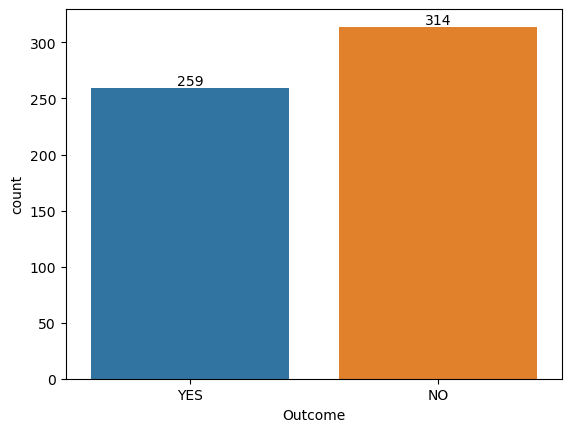

In [8]:
ax = sns.countplot(x =df.Outcome)
for container in ax.containers:
    ax.bar_label(container)

In [9]:
#Check How much of the value label that you want classify

df['Outcome'].value_counts()


Outcome
NO     314
YES    259
Name: count, dtype: int64

### Step 3: Splitting Data
* **using the function train_test_split().**
* **3 parameters: features, target, and test_set size.** 

#### 3.1 Select Featrues 
* **X for the predictor features : array in 2D**
* **y for Target feature or Label feature for prediction : array in 1D**

In [10]:
# X array of features for training
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50.0
1,1,85,66,29,0,26.6,0.351,31.0
2,8,183,64,0,0,23.3,0.672,32.0


In [11]:
# Target variable: Y array
y = df['Outcome']
y.head(3)





0    YES
1     NO
2    YES
Name: Outcome, dtype: object

#### 3.2 Split X and y into training and testing sets
* **from sklearn.model_selection import train_test_split**
* **You need to pass 3 parameters: features, target, and test_set size.** 

In [12]:
# import the package
from sklearn.model_selection import train_test_split



In [13]:
# Using function "train_test_split()" 
# Seperate dataset into 4 set: X_train, X_test, y_train and y_test
# test_size = 0.3 is mean seperate dataset into 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)



In [14]:
X_train.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50.0
1,1,85,66,29,0,26.6,0.351,31.0


In [15]:
X_test.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
401,3,163,70,18,105,31.6,0.268,28.0
402,9,145,88,34,165,30.3,0.771,53.0


In [16]:
y_train.head(2)

0    YES
1     NO
Name: Outcome, dtype: object

In [17]:
y_test.head(2)

401    YES
402    YES
Name: Outcome, dtype: object

### 4. Model Development and Prediction
* **from sklearn.tree import DecisionTreeClassifier**

In [18]:
# import the class fucntion DecisionTree

from sklearn.tree import DecisionTreeClassifier


#### 4.1 Training is done by calling the fit method and pass the training data.

In [19]:
# instantiate the model (using the default parameters)
model = DecisionTreeClassifier()


# fit the model with data
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### 4.2 Prediction on the "test set" using predict(). 

In [20]:
#test prediction
y_predicted = model.predict(X_test)
y_predicted



array(['YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO',
       'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO

#### 4.3 Comparision with Actual y_test(that you already split) vs Prediction on the "test set" using model
* **Create DataFrame 2 columns**
* **using function:: pd.DataFrame.from_dict()**

In [21]:
df_prediction = pd.DataFrame.from_dict({'Actual': list(y_test.values), 'Predicted': list(y_predicted)})

In [22]:
df_prediction.tail()

,Actual,Predicted
167,NO,NO
168,YES,YES
169,NO,NO
170,YES,NO
171,NO,NO


#### 4.4 Evaluating the Model : calculating the accuracy
* using from sklearn.metrics import accuracy_score 

In [23]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct?
print("Decision Tree of Accuracy: ", accuracy_score(y_test,y_predicted))

Decision Tree of Accuracy:  0.6918604651162791


#### 4.5 Classification report
* **using from sklearn.metrics import classification_report**
* **Accuracy: represents the number of correctly classified data instances over the total number of data instances.**
* **Precision (positive predictive value) in classifying the data instances**
* **Recall: should ideally be 1 (high) for a good classifier.**
* **F1-score is a metric which takes into account both precision and recall: F1 Score becomes 1 only when precision and recall are both 1**


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

          NO       0.70      0.71      0.71        90
         YES       0.68      0.67      0.67        82

    accuracy                           0.69       172
   macro avg       0.69      0.69      0.69       172
weighted avg       0.69      0.69      0.69       172



In [25]:
# accuracy = (TP+TN)/(TP+TN+FP+FN)
print((65+55)/(65+25+27+55))

0.6976744186046512


In [26]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_predicted)
cf_matrix

array([[64, 26],
       [27, 55]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

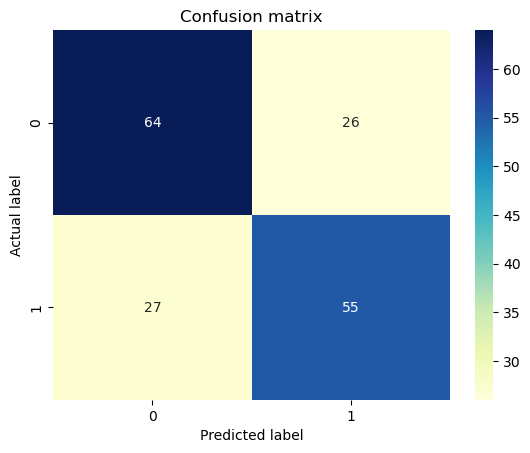

In [27]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Hyperparameter Tuning for Decision Tree Classifiers (Optimizing Performance)
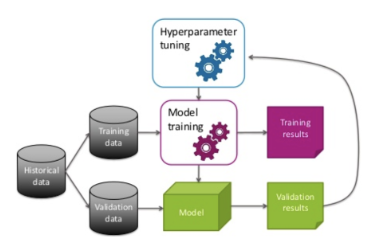

reference image: https://pbollimp.github.io/Meta-Machine-Learning/images/image9.png

### Step5: Decide which hyperparameters to test
* **criterion – the function that’s used to determine the quality of a split**
** Attribute Selection Measures (ASM): **Gini Index:"gini"** is the default of function Decision Tree(), **Information Gain: "entropy”)**
* **max_depth – the maximum depth of the tree**

#### 5.1: Change criterion : criterion = 'gini'

In [28]:
# instantiate the model + using hyperparameters with criterion = 'gini'
model = DecisionTreeClassifier(criterion="gini")



In [29]:
# fit the model with data
model.fit(X_train, y_train)

#Predict the response for test dataset
y_predicted = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Decision Tree of Accuracy:",accuracy_score(y_test, y_predicted))

Decision Tree of Accuracy: 0.6802325581395349


#### 5.2: Change criterion : criterion = 'entropy'

In [30]:
# instantiate the model + using hyperparameters with criterion = 'entropy'
model = DecisionTreeClassifier(criterion="entropy")


# fit the model with data
model.fit(X_train, y_train)

#Predict the response for test dataset
y_predicted = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Decision Tree of Accuracy:",accuracy_score(y_test, y_predicted))

Decision Tree of Accuracy: 0.686046511627907


#### 5.3: Change criterion : criterion = 'gini' and max_depth = 3

In [31]:
# instantiate the model (using the default parameters)
model = DecisionTreeClassifier(criterion="gini", max_depth=3)


# fit the model with data
model.fit(X_train, y_train)

#Predict the response for test dataset
y_predicted = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Decision Tree of Accuracy:",accuracy_score(y_test, y_predicted))

Decision Tree of Accuracy: 0.7441860465116279


#### 5.4: Change criterion : criterion = 'entropy' and max_depth = 3

In [32]:
# instantiate the model (using the default parameters)
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)


# fit the model with data
model.fit(X_train, y_train)

#Predict the response for test dataset
y_predicted = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Decision Tree of Accuracy:",accuracy_score(y_test, y_predicted))

Decision Tree of Accuracy: 0.7441860465116279


# ##############################################################

# Random Forest Model

## 6. Model Development and Prediction
* **from sklearn.ensemble import RandomForestClassifier**

In [33]:
# import the class fucntion Randomforest
from sklearn.ensemble import RandomForestClassifier


In [34]:
# instantiate the model (using the default parameters)
model_randomforest = RandomForestClassifier()


In [35]:
# fit the model with data
model.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [36]:
#Predict the response for test dataset
y_predicted = model.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(y_test, y_predicted))



Accuracy: 0.7441860465116279


In [37]:
# Model Accuracy, how often is the classifier correct?
print("Random Forest of Accuracy:",accuracy_score(y_test, y_predicted))

Random Forest of Accuracy: 0.7441860465116279


## 7. Decide which hyperparameters to test
* ### n_estimators = 100
* ### max_depth = 5

In [38]:
# instantiate the model (using the default parameters)
model = RandomForestClassifier(n_estimators=100)



In [39]:
# fit the model with data
model_randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
#Predict the response for test dataset
y_predicted = model_randomforest.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Random Forest of Accuracy:",accuracy_score(y_test, y_predicted))

Random Forest of Accuracy: 0.7906976744186046
